# Tic Tac Toe - Reinforcement Learning

![](http://img1.encyclopedie-incomplete.com/local/cache-vignettes/L440xH381/morpion_tic-tac-toe-b3a0a.jpg)

##### Introduction

This notebook will hold a few experiments I made during my discovery of Reinforcement Learning. <br>
I wanted to build a simple game with all the environment-agent components : 
- The environment modelling and the game
- The agents : Human, Random, Rules-Based, and RL based

What was best than a simple **Tic Tac Toe** game then ? <br>
The environment is only a 3*3 grid with 3 states possible by cell. That sounded like a perfect playground. 

##### Summary
1. How to set up and build an environment
2. Looking at some games 
3. Training a RL Agent
4. First experiments
5. Improving the RL Agent
6. Second experiments

###### Links and references

- [Udemy course on RL](https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python/)  
- [Deep Reinforcement Learning: Pong from Pixels](http://karpathy.github.io/2016/05/31/rl/) Andrej Karpathy's blog article on RL (always a reference)
- [Beginner's guide to RL](https://www.analyticsvidhya.com/blog/2017/01/introduction-to-reinforcement-learning-implementation/) - Analytics Vidhya
- [Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments](https://arxiv.org/pdf/1706.02275.pdf) - OpenAI
- [Davild Silver course on RL at UCL]()

##### Libraries

In [3]:
# Usual
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.append("C:/git/ai-library/")

# Autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
% matplotlib inline

# Seaborn config
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

# Deep Learning (Keras, Tensorflow)
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop, Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D,ZeroPadding2D,Conv2D
from keras.utils.np_utils import to_categorical

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Import the Tic Tac Toe library
To improve readibility and adopt a library oriented philosophy, most of the code is written in my general purpose AI library.<br>
Available in the repo https://github.com/TheoLvs/ai-library/blob/master/ai/rl/tictactoe.py

In [4]:
from ai.rl.tictactoe import *

***

# Set up the environment
To model this problem, we will take an Oriented Object Programming approach and define :  
- A grid made of cells
- An AI agent trained by RL and a AI agent that knows rules
- An environment for the agents to discover the grid with rules
- A Game to simulate a run of the Tic Tac Toe Game 

## Define the grid
In this section I will describe the modelling approach for those type of problems. <br>
I will show sections of the code, but the full reasoning is available at https://github.com/TheoLvs/ai-library/blob/master/ai/rl/tictactoe.py


### Cell
I could have considered a tic tac toe grid as a numpy matrix. <br> 
But I prefer the approach of taking a grid of 3x3 "Cell" objects with more properties. <br>
Thus I defined a Cell class with a few properties : 
- a **value** attribute : 0 for an empty cell, 1 for a cell occuped by the first player, 2 for a cell occupied by the second
- a **vectorizing** method : to encode the value in a one hot vector, example [0,0,1] for a value of 2, this is how we will consider a cell value for the RL part
- a **representation** to display a game : empty if not occupied, otherwise "x" for player 1 and "o" for player 2

### Grid

A grid is an object made of **Cells** objects. <br>

##### The important properties are mostly the rules in the environment : 
- Is a game done ? Who has won ? Is it a draw ?
- You cannot tick a cell already occupied

##### The important methods will help me to
- change the state of a cell (occupied by one player)
- get the position and number of free and occupied cells (useful to define the rules of the environment)

In [3]:
# Define an empty grid
example_grid = Grid()

# Set two ticks ((position,player))
example_grid.set_value((1,1),1)
example_grid.set_value((2,2),2)

# Visualize the grid and the state of the game
example_grid

|   |   |   |
|   | x |   |
|   |   | o |


3x3 TicTacToe grid

## Define the agents
The agents (players) are the entities interacting with the environment (the grid). <br> 
Every agent designed here will be objects inherited from a agent baseline class. 

### The agent baseline

The Agent class is an abstract class with mostly void methods that are not used by the agents unless the RL Agent. <br>
In all cases, the agents will have to consider this problem : <br> 
![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/01/11131906/figtmp7.png)<br><br>
This means that considering the current state of the environment, the agent will have to predict an action to make in this environment. <br>
Thus what changes between the different agents are : 
- How to react to a current state ? using the ``predict`` method
- How to process the rewards (only for the RL agent that gains from experience and store data from the environment along its existence)

### The Human agent
The action decision function for the Human agent is quite straightforward, it waits for the user input a position to place the tick on the grid. 

### The random AI agent
The action decision function is even more simple, it takes a random pick among all the free possibilities on the grid. 

### The rules-based AI agent
*SOON*

### The RL AI agent
*SOON*

## Define the game
*SOON*

***
# Some games

## Between two random AIs

In [11]:
# Define the players
player1 = AI_Random_Agent()
player2 = AI_Random_Agent()

# Define the game between the two players
game = Game(player1,player2)

# Launch an episode of the game
time.sleep(1)
game.run_episode()

| o | x | x |
| o | x | o |
| o | o | x |
3x3 TicTacToe grid
>>> Player 2 has won !!


##### Here is an example game :
![](images/game_two_random_agents.gif)

## Between rules-based AI and random AI

In [15]:
# Define the players
player1 = AI_Random_Agent()
player2 = AI_Rules_Agent()

# Define the game between the two players
game = Game(player1,player2)

# Launch an episode of the game
time.sleep(1)
game.run_episode()

| x | x | o |
| o | o | x |
| o |   | x |
3x3 TicTacToe grid
>>> Player 2 has won !!


##### First example
As expected in this game, the rules-based agent ("o") crushed the random agent ("x")
![](images/game_random_rules_agents.gif)

##### Second example
In the second game, there are two phases : 
- The Rules based agent blocked the Random agent on the third column
- Then it attacked on the first column, but was blocked by chance by the random agent
- However it got the diagonal right to secure the win
![](images/game_random_rules_agents2.gif)

***
# RL agent - first model : feed forward neural network with policy gradient
![](https://learnaboutdogs.files.wordpress.com/2011/12/positive-dog-training.jpg)

## Training the RL Agent

In [5]:
# Define the players
player1 = AI_Random_Agent()
player2 = AI_RL_Agent()

# Define the game between the two players
game = Game(player1,player2)

# Launch an episode of the game

| o | x | x |
| o | x | o |
| o | o | x |
3x3 TicTacToe grid
>>> Player 2 has won !!


## Random VS RL Agent

## Rules Based VS RL Agent

## RL Agent VS RL Agent

***
# RL agent - second model : XXX

***
# WORK IN PROGRESS

In [3]:
a = Grid()
# a.set_value((1,1),1)
a.set_value((2,2),2)
a

|   |   |   |
|   |   |   |
|   |   | o |


3x3 TicTacToe grid

In [85]:
player1 = AI_Random_Agent()
# player1 = AI_Rules_Agent()
player2 = AI_RL_Agent(lr = 0.1)
player1 = AI_RL_Agent(lr = 0.05)

g = Game(player1,player2)

In [68]:
g.run_episode()

|   | o | o |
| x | o | x |
| o |   | x |
3x3 TicTacToe grid
>>> Player 2 has won !!


In [92]:
g.run_n_episodes(10000)

100%|███████████████████████████████████| 10000/10000 [00:57<00:00, 173.32it/s]


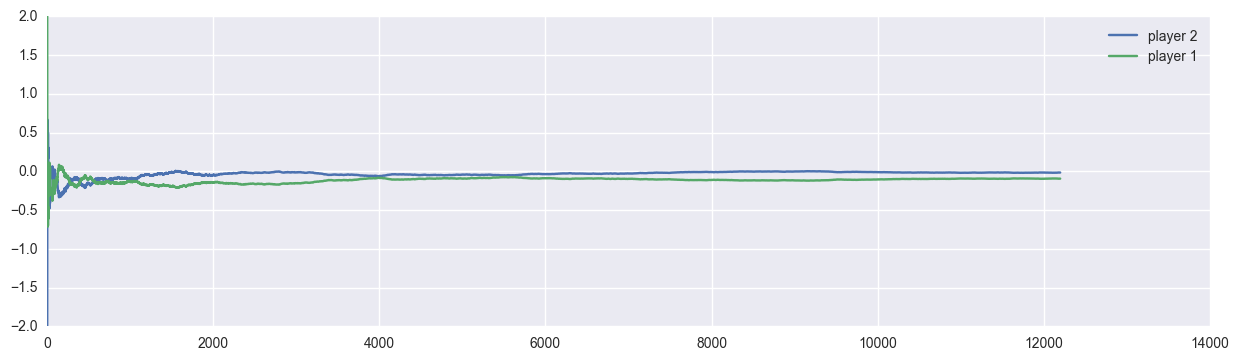

In [93]:
plt.figure(figsize = (15,4))
plt.plot(np.cumsum(player2.running_rewards)/np.array(range(1,len(player2.running_rewards)+1)))
plt.plot(np.cumsum(player1.running_rewards)/np.array(range(1,len(player2.running_rewards)+1)))
plt.legend(["player 2","player 1"])
plt.show()